<a href="https://colab.research.google.com/github/Laser57/A01273286_A4.2/blob/main/Avance4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://i0.wp.com/gershenson.mx/wp-content/uploads/2020/08/logo-tec-de-monterrey-e1484853084274.png?ssl=1" alt="Imagen opcional" width="200"/>
</p>
<style>
h1 {
  text-align: center;
  font-size: 3em;
  color: #4CAF50;
}

h2 {
  text-align: center;
  font-size: 2em;
  color: #FF9800;
  font-style: italic;
}

h3 {
  text-align: center;
  font-size: 1.5em;
  color: #2196F3;
}

ul {
  list-style-type: none;
  text-align: center;
  padding: 0;
}

ul li {
  font-size: 1.2em;
  margin: 10px 0;
}

hr {
  border: 0;
  height: 3px;
  background: #333;
  background-image: linear-gradient(to right, #4CAF50, #2196F3, #FF9800);
}
</style>

# **Proyecto Integrador**


---

## **Trastorno Bipolar**

---

### **Integrantes del Equipo:**

<ul>
  <li>Carlos Daniel Mendoza Paz - A01793027</li>
  <li>Guillermo Alfonso Muñiz Hermosillo - A01793101 </li>
  <li>Luis Alfonso Sabanero Esquivel - A01273286</li>
</ul>

---

### **Grettel Barceló Alonso**

### **Proyecto Integrador**

### **26 de Mayo de 2024**

---






---
# **INICIO**


---





# PROCESAMIENTO DATOS DE LOS FAMILIARES POR FAMILY ID


Creemos que para contar con un modelo más eficiente y de mayor complejidad y fiabilidad es necesario agrupar los datos actuales de acuerdo con grupos familiares.

Es por eso por lo que se agruparan las familias en un data frame utilizando el Family_ID y las relaciones familiares como métodos de agrupación.


# Importación de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

db_Bipolar = 'final_dataframe.xlsx'


final_df = pd.read_excel(db_Bipolar)


# Estadistica de datos

In [2]:
# Descripcion general de los datos
print("Descripción general de la forma y los tipos de datos:")
print(final_df.info())

Descripción general de la forma y los tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Family_ID                                72 non-null     int64 
 1   Age_Proband                              72 non-null     int64 
 2   Gender_Proband                           72 non-null     object
 3   Marital_Status_Proband                   72 non-null     object
 4   School_Years_Proband                     72 non-null     object
 5   Religion_Proband                         72 non-null     object
 6   Employment_Proband                       72 non-null     object
 7   Bipolar_DIGS_Proband                     72 non-null     bool  
 8   Proband_Relation_Familiar1               72 non-null     object
 9   Age_y_Familiar1                          72 non-null     int64 
 10  Gender_y_F

In [3]:
# Aplicamos estadistica descriptiva solo a las variables numéricas
final_df.describe(include=[np.number])

,Family_ID,Age_Proband,Age_y_Familiar1,Age_y_Familiar2
count,72.000000,72.000000,72.000000,72.000000
mean,137.000000,39.972222,51.861111,45.972222
std,25.584436,14.067215,14.574051,15.917014
min,100.000000,15.000000,20.000000,23.000000
25%,116.000000,28.750000,44.000000,31.500000
50%,129.000000,38.500000,50.000000,45.000000
75%,155.250000,47.250000,63.500000,56.000000
max,187.000000,78.000000,83.000000,87.000000


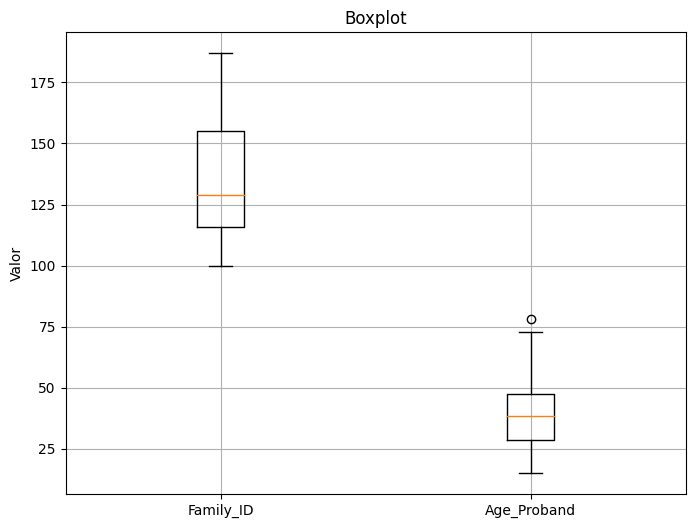

In [4]:
import matplotlib.pyplot as plt

# Accedemos a las columnas numéricas
columna1 = final_df['Family_ID']
columna2 = final_df['Age_Proband']

# Creamos un boxplot para ver si tenemos outliers
plt.figure(figsize=(8, 6))
plt.boxplot([columna1, columna2], labels=['Family_ID', 'Age_Proband'])
plt.title('Boxplot')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


In [5]:
# Aplicamos estadistica descriptiva solo a las variables categoricas

final_df.describe(include=[object, bool]).T


,count,unique,top,freq
Gender_Proband,72,2,Female,37
Marital_Status_Proband,72,5,Married,33
School_Years_Proband,72,6,College,26
Religion_Proband,72,3,Catholic,56
Employment_Proband,72,2,Yes,45
Bipolar_DIGS_Proband,72,2,True,53
Proband_Relation_Familiar1,72,7,Mother,33
Gender_y_Familiar1,72,2,Female,50
Marital_Status_y_Familiar1,72,5,Married,45
School_Years_y_Familiar1,72,5,College,26


# Análisis univariante
Se emplean técnicas de visualización (histogramas, boxplot, gráficos de barras) en función del tipo de datos y la escala de medición.


### Frecuencia de las clases en variables categóricas

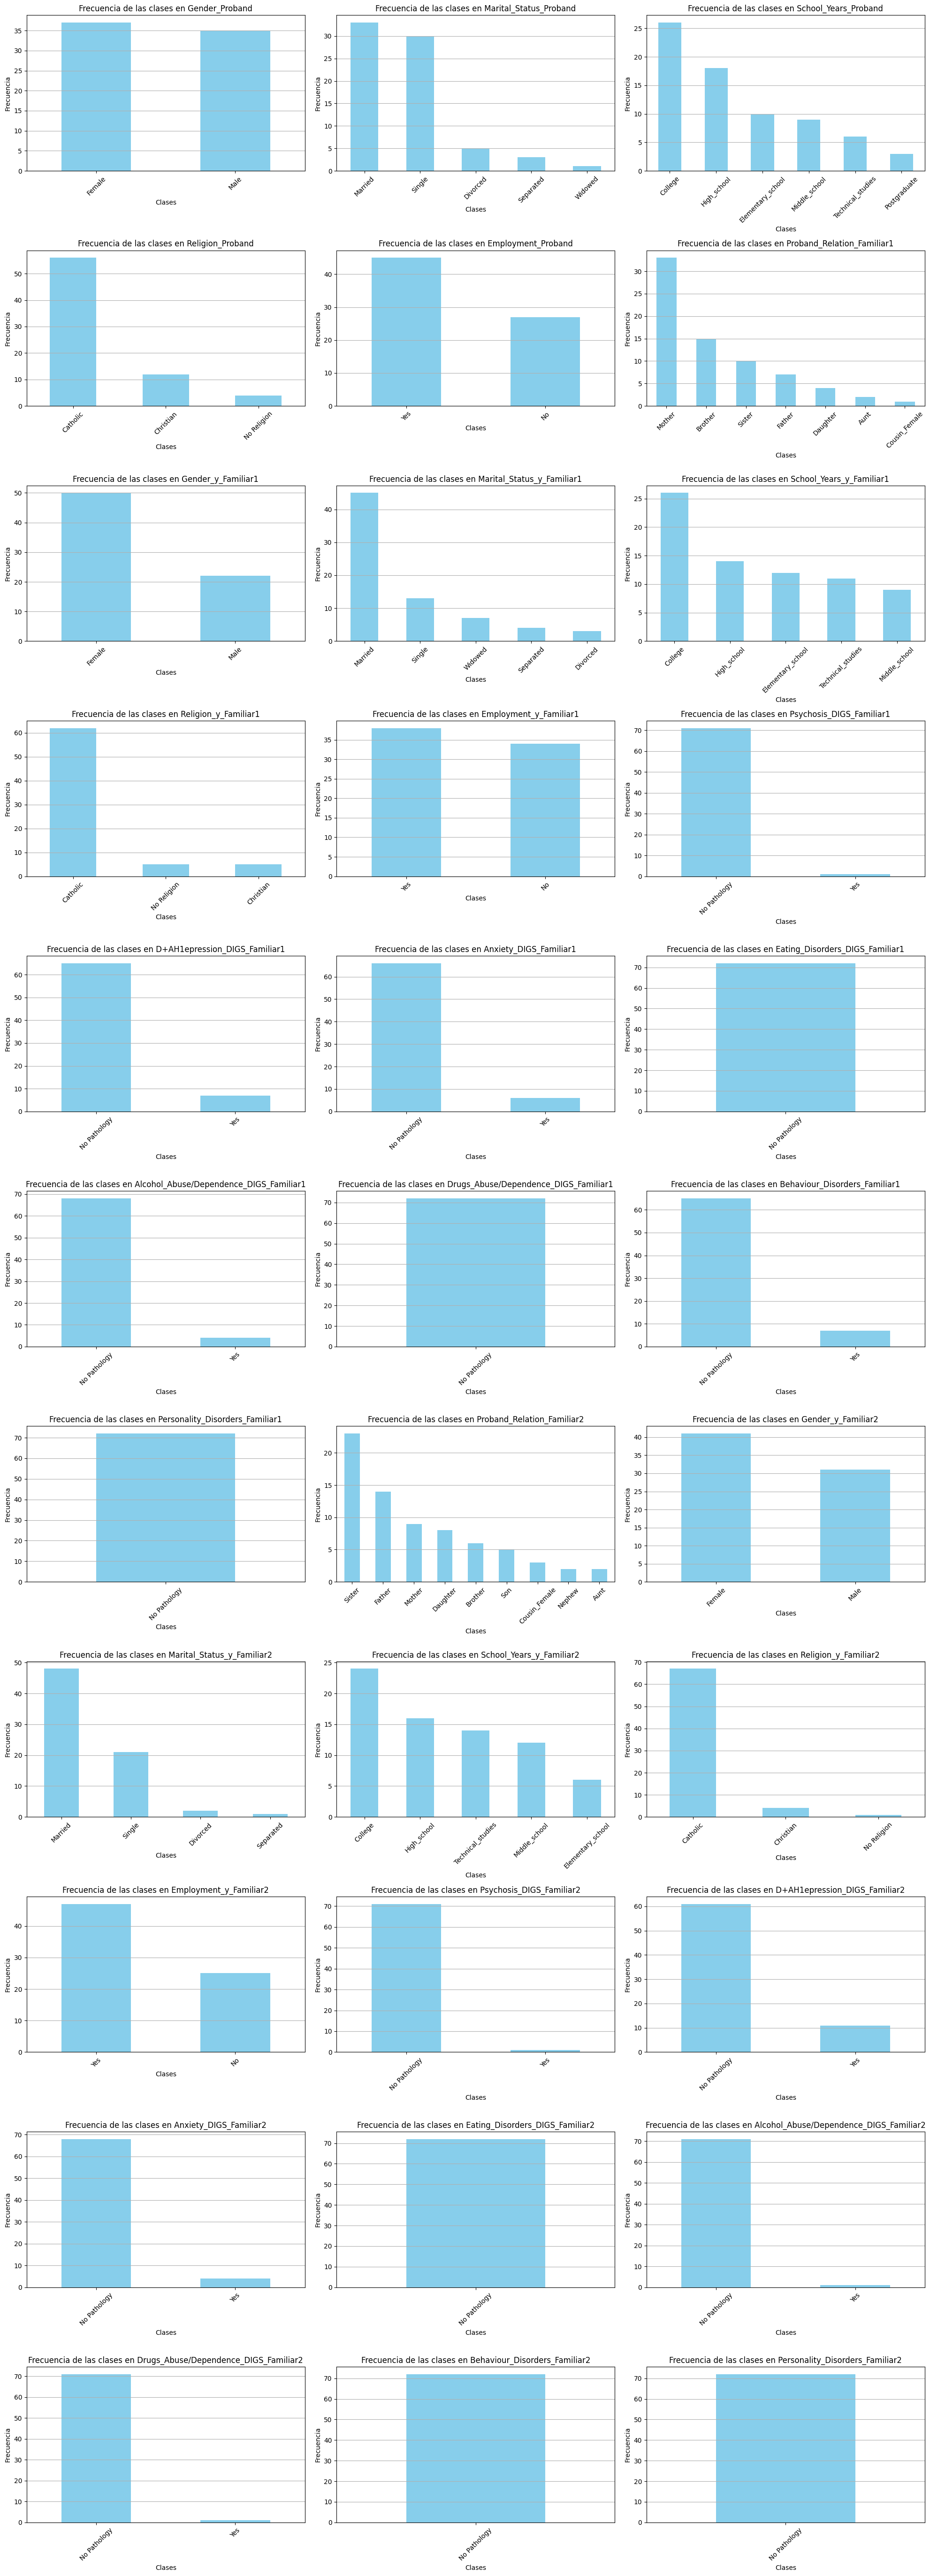

In [6]:
# Calculamos la frecuencia de cada una de las clases excepto la clase de salida


# Obtener todas las columnas categóricas excepto 'Psychiatric_Diagnosis_DIGS'
columnas_categoricas = final_df.select_dtypes(include='object').columns
columnas_graficas = [columna for columna in columnas_categoricas if columna != 'Psychiatric_Diagnosis_DIGS']

# Configuración de la figura
num_subplots = len(columnas_graficas)
num_cols = 3
num_rows = (num_subplots + num_cols - 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Iteramos sobre las columnas seleccionadas y generamos cada gráfico
for i, nombre_columna in enumerate(columnas_graficas):
    # Calculamos la frecuencia de las clases
    frecuencia_clases = final_df[nombre_columna].value_counts()

    # Calculamos la posición del subplot
    fila = i // num_cols
    columna = i % num_cols

    # Creamos el gráfico de barras en el subplot correspondiente
    frecuencia_clases.plot(kind='bar', color='skyblue', ax=axs[fila, columna])
    axs[fila, columna].set_title(f"Frecuencia de las clases en {nombre_columna}")  # Utilizamos el nombre de la columna
    axs[fila, columna].set_xlabel("Clases")
    axs[fila, columna].set_ylabel("Frecuencia")
    axs[fila, columna].tick_params(axis='x', rotation=45)
    axs[fila, columna].grid(axis='y')

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()

# Mostramos los gráficos
plt.show()

# Análisis bi/multivariante

Se efectúan análisis de correlación (cuantitativos y gráficos) para explorar las relaciones entre las variables importantes del conjunto de datos.

Debido a que nuestras features consisten principalmente en variables categóricas con etiquetas podemos usar técnicas de análisis de asociación diseñadas para este tipo de variables.

Tales como el coeficiente de correlación de Spearman y Kendall

Así mismo podemos reducir la dimensionalidad de nuestras features mediante el uso de técnicas como el Análisis de Componentes Principales (PCA) para obtener las combinaciones lineales que capturen la mayor parte de la variabilidad de los datos


In [7]:
# Hacemos una copia de los datos sin valores faltantes o nulos
multi_df = final_df.copy()
multi_df.head()

,Family_ID,Age_Proband,Gender_Proband,Marital_Status_Proband,School_Years_Proband,Religion_Proband,Employment_Proband,Bipolar_DIGS_Proband,Proband_Relation_Familiar1,Age_y_Familiar1,...,Behaviour_Disorders_Cercanos,Personality_Disorders_Cercanos,Psychosis_DIGS_Lejanos,D+AH1epression_DIGS_Lejanos,Anxiety_DIGS_Lejanos,Eating_Disorders_DIGS_Lejanos,Alcohol_Abuse/Dependence_DIGS_Lejanos,Drugs_Abuse/Dependence_DIGS_Lejanos,Behaviour_Disorders_Lejanos,Personality_Disorders_Lejanos
0,159,54,Male,Married,College,Catholic,No,True,Mother,58,...,False,False,False,False,True,False,False,False,False,False
1,143,39,Male,Separated,College,Catholic,No,True,Sister,70,...,False,False,False,False,False,False,False,False,False,False
2,143,73,Male,Married,Elementary_school,Catholic,No,True,Sister,70,...,False,False,False,False,False,False,False,False,False,False
3,144,21,Male,Single,Elementary_school,Catholic,Yes,True,Mother,41,...,True,False,False,False,False,False,False,False,False,False
4,126,33,Female,Married,Middle_school,Catholic,No,True,Mother,50,...,False,False,False,True,True,False,False,False,True,False


In [8]:
# Creamos un metodo que realice un boxplot que nos muestre la distribucion de los pacientes
# con Bipolaridad respecto a otro campo.

def get_bipolar_boxplot_by(campo, custom_palette):
  plt.figure(figsize=(8, 6))

  sns.boxplot(x='Bipolar_DIGS_Proband', y='Age_Proband', data=multi_df, hue='Bipolar_DIGS_Proband', palette=custom_palette)
  # Mostramos el rango de valores del campo elegido como líneas verticales y valores numéricos
  for i, cat in enumerate(multi_df['Bipolar_DIGS_Proband'].unique()):
    subset = multi_df[multi_df['Bipolar_DIGS_Proband'] == cat]
    min_field = subset[campo].min()
    max_field = subset[campo].max()
    plt.axhline(min_field, color=custom_palette[cat], linestyle='--', linewidth=1)
    plt.axhline(max_field, color=custom_palette[cat], linestyle='--', linewidth=1)
    plt.text(i, min_field, f'{min_field}', ha='right', va='center', color=custom_palette[cat], fontsize=10)
    plt.text(i, max_field, f'{max_field}', ha='right', va='center', color=custom_palette[cat], fontsize=10)

  # Agregar etiquetas y título
  plt.xlabel('Bipolaridad')
  plt.ylabel(campo)
  plt.title(f'Distribución de {campo} con respecto de Bipolaridad')

  # Mostrar el boxplot
  plt.legend(loc='upper right')
  plt.show()

## Distribucion de Bipolaridad por Edad

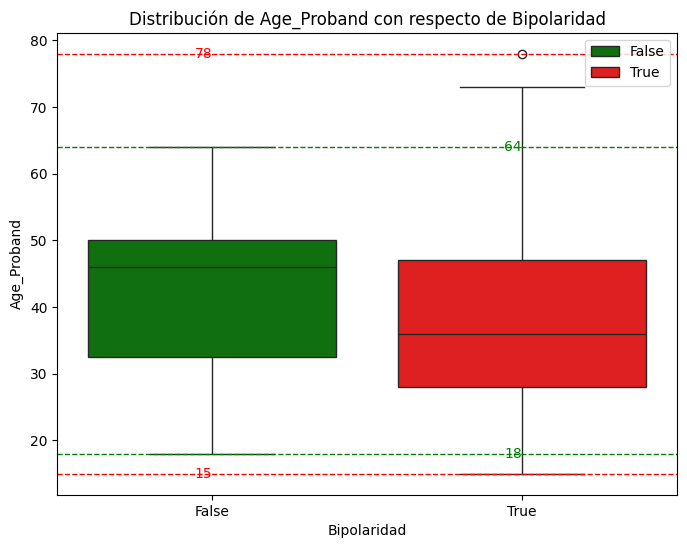

In [9]:
custom_palette = {True: "red", False: "green"}

get_bipolar_boxplot_by("Age_Proband", custom_palette)

El promedio de los pacientes diagnosticados se encuentra en edades que van desde los 20's tardíos hasta los 40's tardíos. Así mismo, encontramos un outlier de 78 años diagnosticado con bipolaridad.

## Bipolaridad por Genero

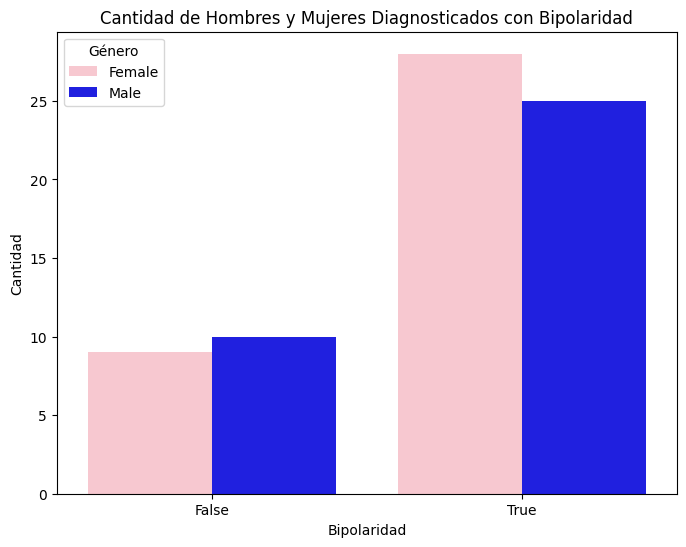

In [10]:
plt.figure(figsize=(8, 6))

# Contar el número de hombres y mujeres diagnosticados con bipolaridad
gender_counts = multi_df.groupby(['Bipolar_DIGS_Proband', 'Gender_Proband']).size().reset_index(name='Count')

# Crear el gráfico de barras
sns.barplot(x='Bipolar_DIGS_Proband', y='Count', hue='Gender_Proband', data=gender_counts, palette={'Male': 'blue', 'Female': 'pink'})

# Agregar etiquetas y título
plt.xlabel('Bipolaridad')
plt.ylabel('Cantidad')
plt.title('Cantidad de Hombres y Mujeres Diagnosticados con Bipolaridad')

# Mostrar el gráfico de barras
plt.legend(title='Género')
plt.show()



In [11]:
gender_counts

,Bipolar_DIGS_Proband,Gender_Proband,Count
0,False,Female,9
1,False,Male,10
2,True,Female,28
3,True,Male,25


# One Hot Encoding



Para trabajar con los métodos mencionados es necesario convertir nuestras variables categóricas en representaciones numéricas antes de calcular las correlaciones.

Usaremos la técnica de One Hot Encoding

**One Hot Encoding:**

El One-Hot Encoding es utilizado para manejar variables categóricas o de tipo nominal en un formato numérico, convierte variables categóricas en un formato numérico donde cada categoría se representa como una columna binaria (0 o 1), facilitando su uso en algoritmos de aprendizaje automático.

En resumen, creamos una columna con valores binarios (0 o 1) para cada categoría. Esto es útil cuando no hay un orden implícito en las categorías. Por lo que utilizaremos las variables nominales



In [12]:
# Definimos las columnas categoricas
columnas_nominales = multi_df.select_dtypes(exclude=np.number).columns.tolist()
columnas_nominales.remove("Bipolar_DIGS_Proband") # Variable de salida
print("----- Columnas Nominales -----")
columnas_nominales

----- Columnas Nominales -----


['Gender_Proband',
 'Marital_Status_Proband',
 'School_Years_Proband',
 'Religion_Proband',
 'Employment_Proband',
 'Proband_Relation_Familiar1',
 'Gender_y_Familiar1',
 'Marital_Status_y_Familiar1',
 'School_Years_y_Familiar1',
 'Religion_y_Familiar1',
 'Employment_y_Familiar1',
 'Psychosis_DIGS_Familiar1',
 'D+AH1epression_DIGS_Familiar1',
 'Anxiety_DIGS_Familiar1',
 'Bipolar_DIGS_y_Familiar1',
 'Eating_Disorders_DIGS_Familiar1',
 'Alcohol_Abuse/Dependence_DIGS_Familiar1',
 'Drugs_Abuse/Dependence_DIGS_Familiar1',
 'Behaviour_Disorders_Familiar1',
 'Personality_Disorders_Familiar1',
 'Proband_Relation_Familiar2',
 'Gender_y_Familiar2',
 'Marital_Status_y_Familiar2',
 'School_Years_y_Familiar2',
 'Religion_y_Familiar2',
 'Employment_y_Familiar2',
 'Psychosis_DIGS_Familiar2',
 'D+AH1epression_DIGS_Familiar2',
 'Anxiety_DIGS_Familiar2',
 'Bipolar_DIGS_y_Familiar2',
 'Eating_Disorders_DIGS_Familiar2',
 'Alcohol_Abuse/Dependence_DIGS_Familiar2',
 'Drugs_Abuse/Dependence_DIGS_Familiar2',
 

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Crear one-hot encoding para las variables categóricas
one_hot_df = multi_df.copy()
# Quitar las columnas nominales de one_hot_df
one_hot_df.drop(columns=columnas_nominales, inplace=True)

# Inicializar el codificador OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
# Ajustar y transformar las columnas nominales usando ordered_df
nominales_encoded = one_hot_encoder.fit_transform(multi_df[columnas_nominales])
# Obtener los nombres de las nuevas columnas generadas por el codificador
nuevas_columnas = one_hot_encoder.get_feature_names_out(columnas_nominales)

# Convertir los valores codificados a enteros
nominales_encoded_int = nominales_encoded.astype(int)

print(nominales_encoded_int.shape, len(nuevas_columnas))
# Crear un nuevo DataFrame con las columnas codificadas
one_hot_encoded_df = pd.DataFrame(nominales_encoded_int, columns=nuevas_columnas)
one_hot_encoded_df = one_hot_encoded_df.astype(int)

# Resetear los índices para asegurar una alineación adecuada antes de hacer merge
one_hot_df.reset_index(drop=True, inplace=True)
one_hot_encoded_df.reset_index(drop=True, inplace=True)

# Concatenar el DataFrame codificado con las columnas del DataFrame original que no son nominales

one_hot_df = pd.merge(one_hot_df, one_hot_encoded_df, left_index=True, right_index=True, how='inner')
one_hot_df.head()

(72, 74) 74


,Family_ID,Age_Proband,Bipolar_DIGS_Proband,Age_y_Familiar1,Age_y_Familiar2,Gender_Proband_Male,Marital_Status_Proband_Married,Marital_Status_Proband_Separated,Marital_Status_Proband_Single,Marital_Status_Proband_Widowed,...,Alcohol_Abuse/Dependence_DIGS_Cercanos_True,Drugs_Abuse/Dependence_DIGS_Cercanos_True,Behaviour_Disorders_Cercanos_True,Personality_Disorders_Cercanos_True,Psychosis_DIGS_Lejanos_True,D+AH1epression_DIGS_Lejanos_True,Anxiety_DIGS_Lejanos_True,Alcohol_Abuse/Dependence_DIGS_Lejanos_True,Drugs_Abuse/Dependence_DIGS_Lejanos_True,Behaviour_Disorders_Lejanos_True
0,159,54,True,58,48,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,143,39,True,70,34,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,143,73,True,70,34,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,144,21,True,41,59,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,126,33,True,50,55,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1


In [14]:
# Imprimimos la forma resultante y validamos que existe algun valor nulo
print(one_hot_df.shape)
one_hot_df[one_hot_df.isnull().any(axis=1)]

(72, 79)


,Family_ID,Age_Proband,Bipolar_DIGS_Proband,Age_y_Familiar1,Age_y_Familiar2,Gender_Proband_Male,Marital_Status_Proband_Married,Marital_Status_Proband_Separated,Marital_Status_Proband_Single,Marital_Status_Proband_Widowed,...,Alcohol_Abuse/Dependence_DIGS_Cercanos_True,Drugs_Abuse/Dependence_DIGS_Cercanos_True,Behaviour_Disorders_Cercanos_True,Personality_Disorders_Cercanos_True,Psychosis_DIGS_Lejanos_True,D+AH1epression_DIGS_Lejanos_True,Anxiety_DIGS_Lejanos_True,Alcohol_Abuse/Dependence_DIGS_Lejanos_True,Drugs_Abuse/Dependence_DIGS_Lejanos_True,Behaviour_Disorders_Lejanos_True


# Normalización
En nuestro análisis del conjunto de datos, creemos que no es necesario aplicar técnicas de normalización a las variables.

Esto se debe a que la mayoría de nuestras características son de naturaleza categórica, lo que significa que representan categorías discretas en lugar de valores numéricos continuos. Las variables categóricas, como el género, la religión, el estado civil y otras, no requieren normalización, ya que la comparación de sus valores se basa en la igualdad o diferencia entre categorías, en lugar de en la magnitud de los valores numéricos.

La única excepción es la variable de edad, que es numérica y podría necesitar ser escalada o normalizada si fuera relevante para nuestro análisis. Sin embargo en esta ocasión, no lo creemos necesario.


# Matriz de correlación y analisis PCA

Matriz de correlación antes de codificar las variables

In [15]:
df_encoded = one_hot_df.copy()
df_chi = multi_df.copy()

In [16]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
categorical_cols = df_chi.select_dtypes(include=['object','bool','int64']).columns.to_list()

p_values = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            p_values.loc[col1, col2] = np.nan
        else:
            contingency_table = pd.crosstab(df_chi[col1], df_chi[col2])  # Aquí se cambia de df a df_encoded
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            p_values.loc[col1, col2] = p

p_values = p_values.astype(float)



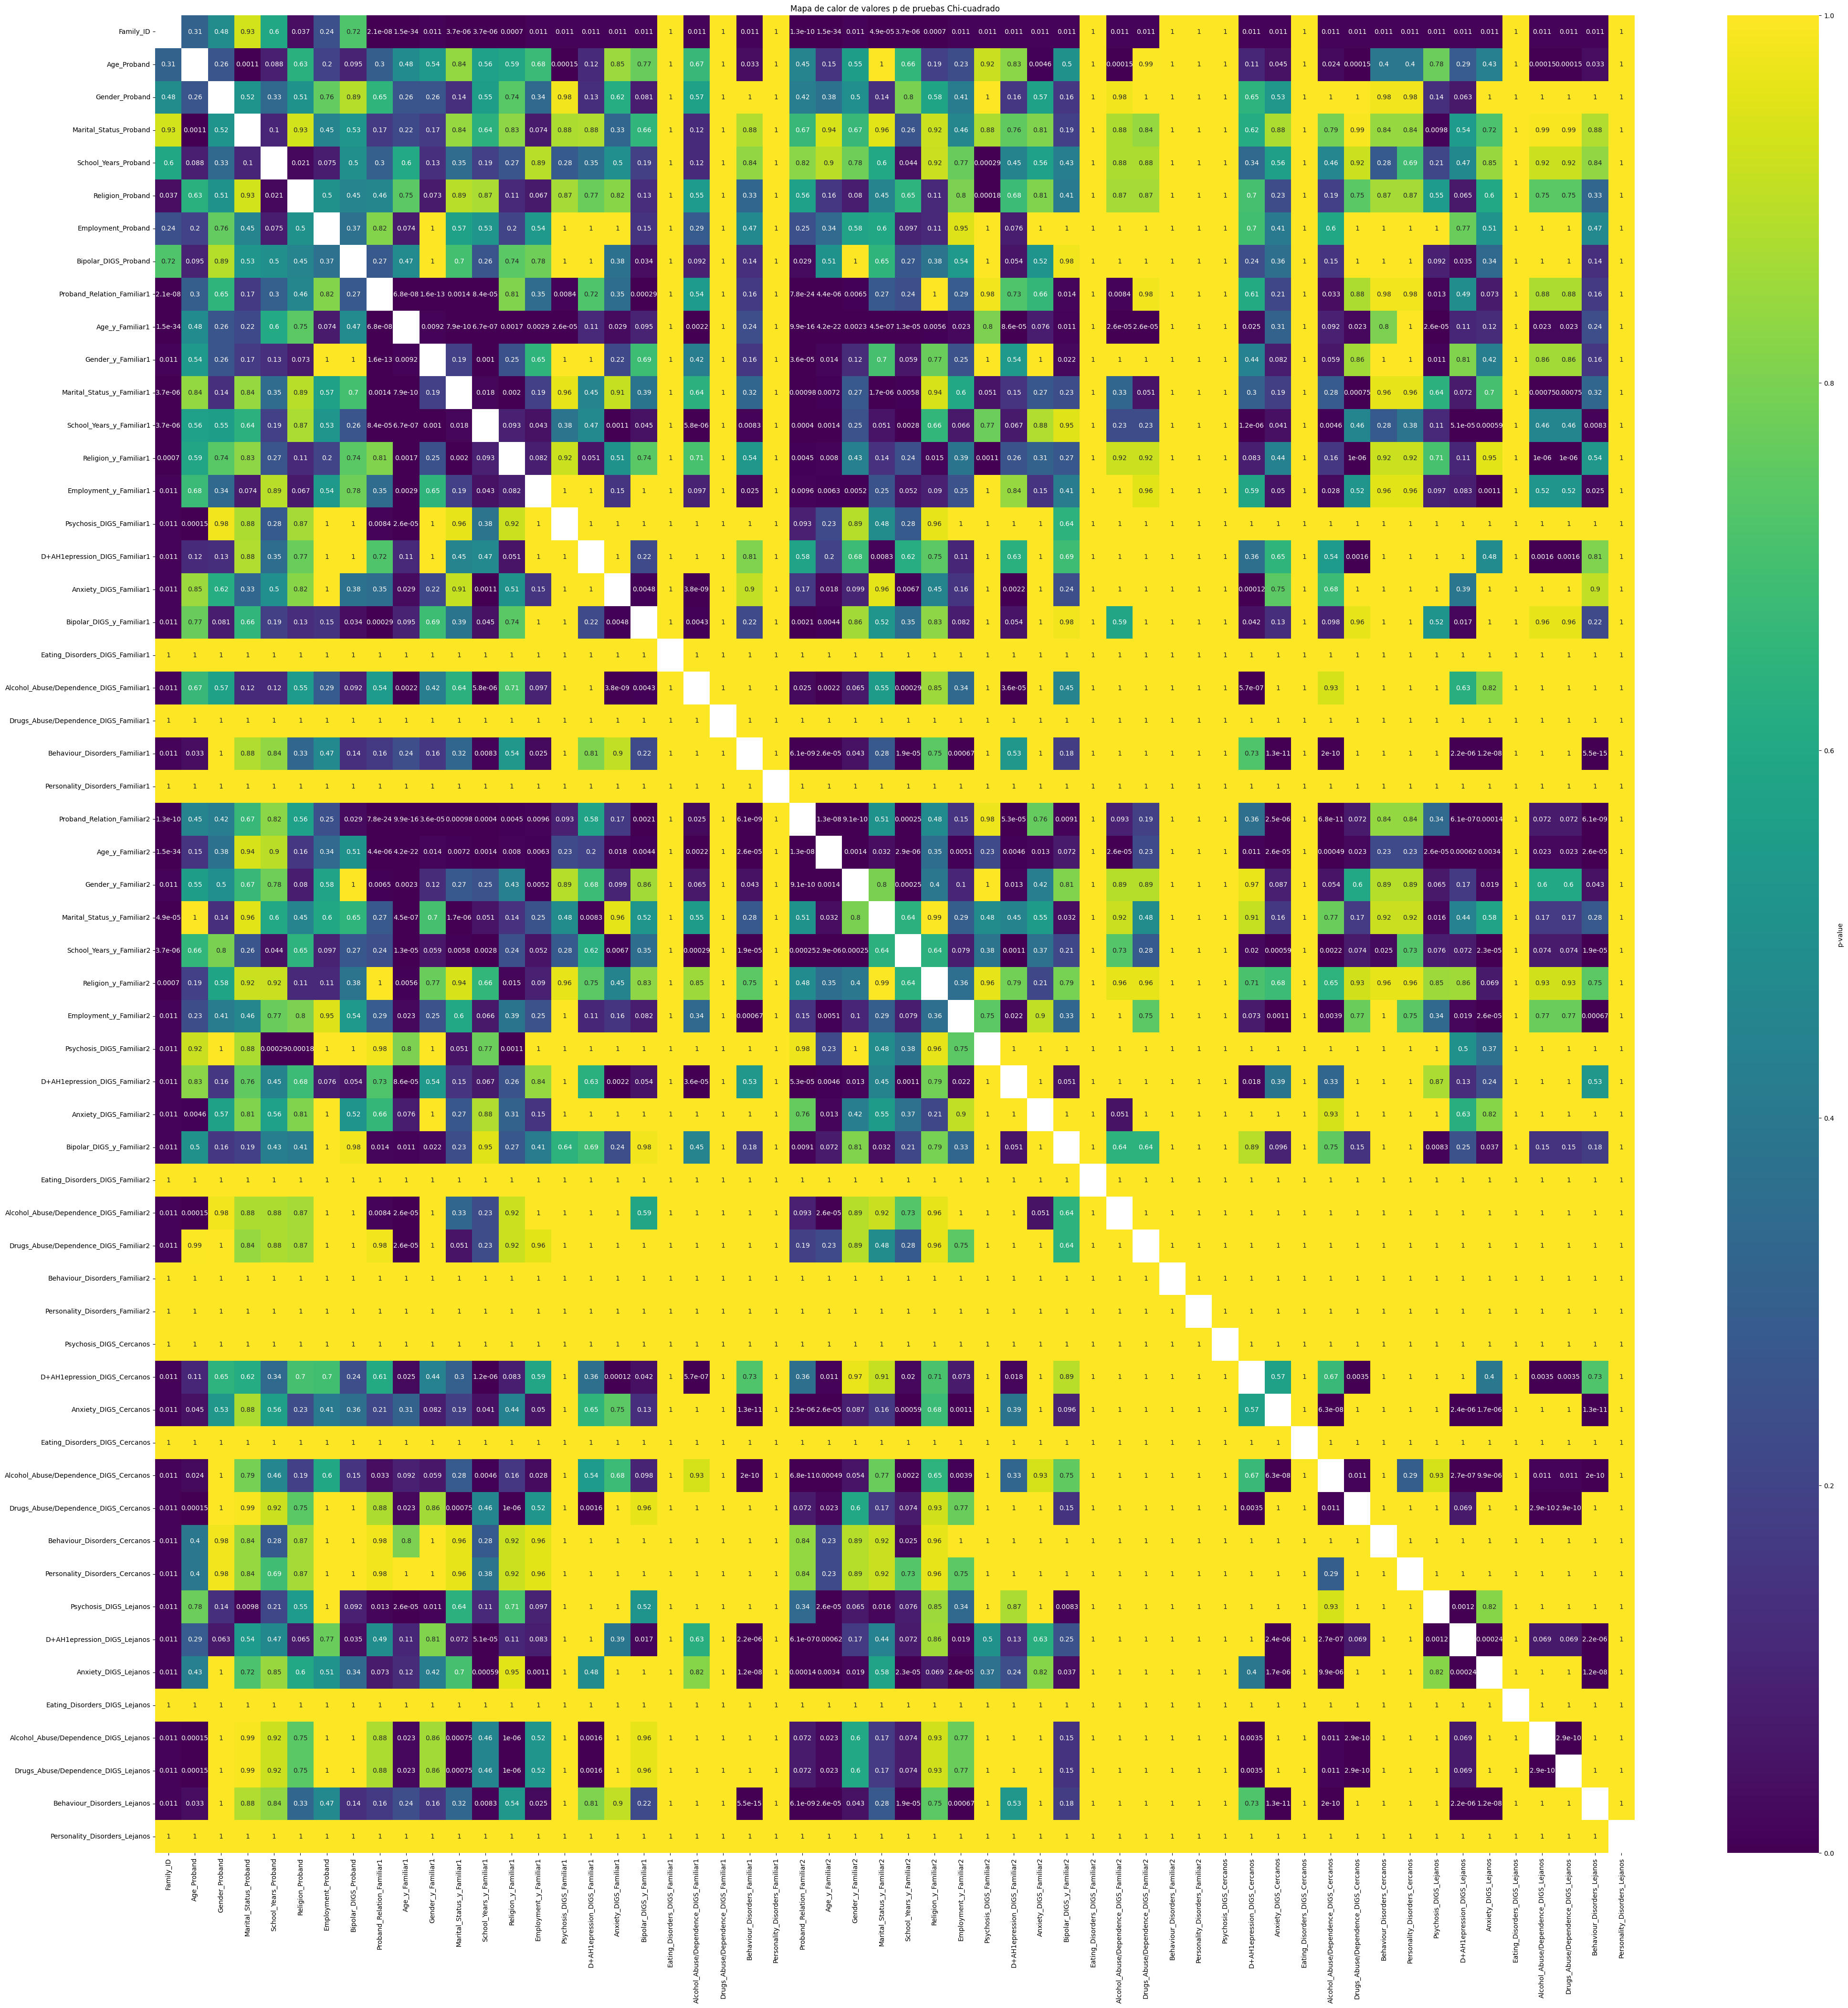

In [17]:
# Visualizar los resultados en un mapa de calor
plt.figure(figsize=(50, 50))
sns.heatmap(p_values, annot=True, cmap='viridis', cbar_kws={'label': 'p-value'})
plt.title('Mapa de calor de valores p de pruebas Chi-cuadrado')
plt.show()

# ANALISIS PCA

In [18]:
from sklearn.decomposition import PCA

def get_PCA(df_encoded):
  # Crear una instancia de PCA
  pca = PCA()

  # Ajustar el modelo PCA a nuestros datos
  pca.fit(df_encoded)

  # Visualizamos el número de componentes necesarios para explicar
  # cierta cantidad de varianza
  total_varianza_explicada = pca.explained_variance_ratio_.cumsum()
  varianza_noventa = sum(total_varianza_explicada < 0.90) + 1
  print("Número de componentes para explicar el 90% de la varianza:",
        varianza_noventa)

  pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance': pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
                          })
  pcsSummary = pcsSummary.transpose()
  pcsSummary = pcsSummary.round(4)

  PC_components = np.arange(varianza_noventa) + 1

  _ = sns.set(style = 'whitegrid',
              font_scale = 1.2
              )

  fig, ax = plt.subplots(figsize=(10, 7))

  _ = sns.barplot(x = PC_components,
                  y = pca.explained_variance_ratio_[:varianza_noventa],
                  color = 'b'
                  )

  _ = sns.lineplot(x = PC_components-1,
                   y = np.cumsum(pca.explained_variance_ratio_[:varianza_noventa]),
                   color = 'black',
                   linestyle = '-',
                   linewidth = 2,
                   marker = 'o',
                   markersize = 8
                   )

  plt.title('Scree Plot > 90% Varianza')
  plt.xlabel('N-th Componente Principal')
  plt.ylabel('Varianza Explicada')
  plt.ylim(0, 1)
  plt.show()

  pca_Components_df = pd.DataFrame(pca.components_.transpose(),
                                columns=pcsSummary.columns,
                                index=df_encoded.columns
                                )
  pca_Components_df.columns = \
   ['PC' + str(i) for i in range(1, pca_Components_df.shape[1] + 1)]
  pca_Components_df = pca_Components_df.sort_values(by='PC1', ascending=False)
  return pca_Components_df.iloc[:, :varianza_noventa]

Número de componentes para explicar el 90% de la varianza: 4


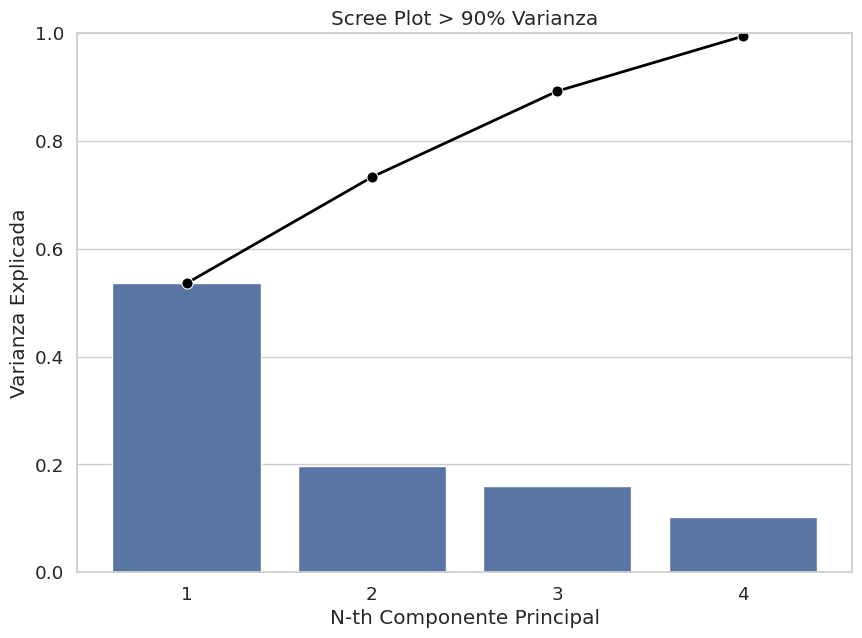

,PC1,PC2,PC3,PC4
Family_ID,0.935538,-0.346781,0.041997,-0.048034
Age_Proband,0.019635,0.101765,0.896748,0.428604
School_Years_y_Familiar2_Technical_studies,0.006849,-0.004825,-0.004123,-0.002400
Proband_Relation_Familiar1_Sister,0.004454,0.000465,0.002474,-0.002524
Marital_Status_y_Familiar1_Separated,0.003712,-0.001965,-0.001944,0.001533
Marital_Status_y_Familiar1_Single,0.003228,0.004229,0.002941,0.004302
Gender_Proband_Male,0.003214,-0.003013,0.000425,0.003103
School_Years_y_Familiar1_Elementary_school,0.003092,-0.003152,-0.004368,-0.000980
Proband_Relation_Familiar2_Daughter,0.002745,0.000435,0.002381,-0.001558
School_Years_Proband_High_school,0.002524,-0.001731,-0.010988,-0.003393


In [19]:
components = get_PCA(df_encoded)
components.head(20)

La aplicación del análisis de componentes principales (PCA) en nuestro conjunto de datos revela que existen cuatro componentes principales los cuales explican el 90% de la variabilidad en nuestras características.

Este resultado consideramos es significativo ya que nos proporciona una reducción efectiva de la dimensionalidad, permitiéndonos resumir la información contenida en múltiples variables originales en solo cuatro componentes.

Al examinar los elementos principales de estos componentes, podemos observar las contribuciones relativas de cada característica a la variabilidad total.

Por ejemplo, además de que todos los componentes muestran la dependencia al Family_ID podemos observar como las relaciones con los familiares cercanos y la edad son importantes en cada uno de ellos.

Así mismo observamos que cada componente tiene variaciones significativas para cada característica encontrada.


# Conclusiones Avance 2

** ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? **

En el conjunto de datos se encontraron algunos datos faltantes, los cuales tenían la etiqueta de Missing o en algunos casos había valores con símbolos o números incorrectos, diferentes a la escala en la que se estaba trabajando para cada una de las variables categóricas, por ende esos valores fueron sustituidos por la moda para cada una de ellas.

**¿Cuáles son las estadísticas resumidas del conjunto de datos? **

En el conjunto de datos se trabajaron dos tipos de estadísticas, una para las variables numéricas y otra para las variables categóricas. Para las numéricas se aplicó un describe para conocer valores estadísticos como el conteo para ver los nulos en cada columna, la media aritmética de los valores, la desviación estándar para conocer la dispersión de los datos alrededor de la media, el valor mínimo de cada variable así como los cuartiles y el valor máximo.


**¿Hay valores atípicos en el conjunto de datos? **

Con base en las estadísticas descriptivas obtenidas y la generación de gráficos boxplot podemos observar que no existen valores atípicos en las variables numéricas del conjunto.

**¿Cuál es la cardinalidad de las variables categóricas? **
También se calculó la cardinalidad para cada una de las variables categóricas y los resultados se mostraron respectivamente.

**¿Hay correlación entre las variables dependientes e independientes? **
Revisando la información de la base de datos, detectamos que existe una correlación promedio entre la variable independiente BIPOLAR_DIGS con respecto a las demás variables de entrada

**¿Existen patrones o agrupaciones (clusters) en los datos con características similares? **
Detectamos un patrón con respecto a las familias entrevistadas y las enfermedades diagnosticadas, lo que parece indicar que la genética familiar tiene un papel importante en el desarrollo y detección de enfermedades psiquiátricas.
**¿Hay desequilibrio en las clases de la variable objetivo? **
En esta base de datos encontramos que la clase objetivo Bipolar_DIGS presenta un desbalance entre los datos positivos/negativos por lo que se pensara en usar una métrica recall o F1 para darle más peso a la clase positiva. En otra opción se considera aplicar técnicas de submuestreo/sobre muestreo para balancear la información.a


En las últimas semanas, hemos avanzado significativamente en la preparación de los datos y la creación de un marco sólido para nuestro modelo de inteligencia artificial destinado a predecir el padecimiento psiquiátrico de bipolaridad. Nuestro enfoque se ha basado en la metodología CRISP-ML, lo que nos ha permitido seguir un proceso estructurado y sistemático desde la comprensión del negocio hasta la preparación de los datos para el modelado.

Comenzamos nuestro viaje comprendiendo las necesidades de nuestro cliente y definiendo claramente los objetivos del proyecto. La propuesta de predecir la bipolaridad mediante la comprensión de las relaciones familiares demostró ser un enfoque prometedor y relevante, lo que nos llevó a centrar nuestros esfuerzos en la exploración y preparación de los datos.

En la fase de comprensión de los datos, nos sumergimos en una exploración detallada, identificando las características más relevantes y eliminando los datos nulos. Para abordar los valores faltantes en variables categóricas, optamos por la imputación de la moda, mientras que para las numéricas, utilizamos la media. Esta decisión nos permitió conservar una cantidad significativa de datos, enriqueciendo así nuestra muestra.

Luego, procedimos con la preparación de los datos, aplicando técnicas de codificación como One Hot Encoding para variables nominales y Label Encoding para ordinales. Además, exploramos la reducción de dimensionalidad utilizando PCA y evaluamos las correlaciones entre las características con la matriz de correlación de Spearman.

La fase de agrupación de datos reveló valiosos insights al identificar y separar a las familias del conjunto de probandos. Eliminamos al paciente diagnosticado para concentrarnos en los patrones familiares, lo que resultó en un total de 76 familias disponibles para el modelado. Este enfoque nos permitió obtener una muestra diversa y representativa para nuestro análisis.

En resumen, hemos sentado las bases sólidas para nuestro modelo de predicción de bipolaridad, demostrando un compromiso con la calidad de los datos y la rigurosidad metodológica en cada etapa del proceso. Mirando hacia el futuro, nos dirigimos hacia la implementación y evaluación de modelos de aprendizaje automático, con el objetivo de ofrecer predicciones precisas y útiles para mejorar la atención médica y el bienestar de los pacientes.

 # Avance 3. Baseline

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar los datos
datos = df_encoded.copy()

# Dividir los datos en características (X) y variable objetivo (y)
X = datos.drop(columns=["Bipolar_DIGS_Proband"])
y = datos["Bipolar_DIGS_Proband"]

# Dividir los datos en entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Crear un modelo de referencia utilizando regresión logística
modelo_referencia = LogisticRegression()

# Entrenar el modelo de referencia en el conjunto de entrenamiento
modelo_referencia.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
predicciones_val = modelo_referencia.predict(X_val)

# Evaluar el rendimiento del modelo de referencia en el conjunto de validación
precision_val = accuracy_score(y_val, predicciones_val)
print("Precisión del modelo de referencia en el conjunto de validación:", precision_val)

# Realizar predicciones en el conjunto de prueba
predicciones_test = modelo_referencia.predict(X_test)

# Evaluar el rendimiento del modelo de referencia en el conjunto de prueba
precision_test = accuracy_score(y_test, predicciones_test)
print("Precisión del modelo de referencia en el conjunto de prueba:", precision_test)


Precisión del modelo de referencia en el conjunto de validación: 0.4166666666666667
Precisión del modelo de referencia en el conjunto de prueba: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Cargar los datos
datos = df_encoded.copy()

# Dividir los datos en características (X) y variable objetivo (y)
X = datos.drop(columns=["Bipolar_DIGS_Proband"])
y = datos["Bipolar_DIGS_Proband"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística con penalización L1
modelo_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')

# Entrenar el modelo de regresión logística con penalización L1 en el conjunto de entrenamiento
modelo_l1.fit(X_train, y_train)

# Crear un modelo de regresión logística con penalización L2
modelo_l2 = LogisticRegression(penalty='l2', C=1.0)

# Entrenar el modelo de regresión logística con penalización L2 en el conjunto de entrenamiento
modelo_l2.fit(X_train, y_train)

# Evaluar los modelos en el conjunto de validación
precision_val_l1 = modelo_l1.score(X_val, y_val)
precision_val_l2 = modelo_l2.score(X_val, y_val)

print("Precisión del modelo con penalización L1 en el conjunto de validación:", precision_val_l1)
print("Precisión del modelo con penalización L2 en el conjunto de validación:", precision_val_l2)


Precisión del modelo con penalización L1 en el conjunto de validación: 0.5
Precisión del modelo con penalización L2 en el conjunto de validación: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import accuracy_score

# Evaluar el modelo con penalización L1 en el conjunto de prueba
precision_test_l1 = modelo_l1.score(X_test, y_test)

# Evaluar el modelo con penalización L2 en el conjunto de prueba
precision_test_l2 = modelo_l2.score(X_test, y_test)

print("Precisión del modelo con penalización L1 en el conjunto de prueba:", precision_test_l1)
print("Precisión del modelo con penalización L2 en el conjunto de prueba:", precision_test_l2)


Precisión del modelo con penalización L1 en el conjunto de prueba: 0.6666666666666666
Precisión del modelo con penalización L2 en el conjunto de prueba: 0.6666666666666666


In [23]:
print("---- RESULTADOS ----")
print("Precisión del modelo con penalización L1 en el conjunto de validación:", precision_val_l1)
print("Precisión del modelo con penalización L1 en el conjunto de prueba:", precision_test_l1)


---- RESULTADOS ----
Precisión del modelo con penalización L1 en el conjunto de validación: 0.5
Precisión del modelo con penalización L1 en el conjunto de prueba: 0.6666666666666666


# Conclusiones Avance 3

**¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo? **

Para este caso en específico podríamos utilizar un algoritmo que sea sencillo dado que tenemos que predecir una clasificación binaria. Para este tipo de problemas como lo es el predecir bipolaridad, un clasificador binario básico como la Regresión Logística puede ser una buena opción.

** ¿Se puede determinar la importancia de las características para el modelo generado? **

Si, se puede determinar a través del uso de diferentes técnicas como el análisis de coeficientes en el modelo de regresión que se hizo. De esta manera se pueden identificar y seleccionar características relevantes para mejorar el rendimiento del modelo.

** ¿El modelo está sub/sobre ajustando los datos de entrenamiento? **
Con base en los resultados obtenidos No parece que el modelo esté sobre ajustando los datos de entrenamiento, ya que la diferencia en la precisión entre los conjuntos de entrenamiento y prueba no es muy grande cuando se aplicó penalización L1, ya que en el modelo estándar si se observa un sobreajuste dada que la precisión en el conjunto de prueba es más baja que en el conjunto de validación (0.75 vs 0.83) lo cual indica que el modelo puede tener dificultades para generalizar datos nuevos.

** ¿Cuál es la métrica adecuada para este problema de negocio? **
Para este caso en específico se está utilizando la métrica de la precisión la cual es comúnmente utilizada en problemas de clasificación y representa las predicciones correctas realizadas por el modelo sobre el total de predicciones en pocas palabras que tan bien el modelo esta clasificando correctamente las muestras.
Sin embargo dado que es un caso médico y se requiere minimizar los falsos negativos se debería utilizar una métrica más adecuada como el recall o el F1 Score y así enfocarse en optimizar el recall para que el modelo no pase por alto casos que realmente son positivos (minimizando falsos negativos).

** ¿Cuál debería ser el desempeño mínimo para obtener? **
Idealmente se debe buscar un modelo que tenga un Recall de 80% en el conjunto de prueba que se acerque más a la precisión en el conjunto de validación, lo que indicaría un mejor equilibrio entre generalización y ajuste al conjunto de entrenamiento.





In [65]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.datasets import make_classification
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, make_scorer,confusion_matrix,recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn import tree
import pydotplus
from IPython.display import Image
from imblearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [52]:
# Cargar los datos
datos = df_encoded.copy()

# Dividir los datos en características (X) y variable objetivo (y)
X = datos.drop(columns=["Bipolar_DIGS_Proband"])
y = datos["Bipolar_DIGS_Proband"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [95]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  #m__C': 0.0001, 'm__class_weight': None, 'm__penalty': 'l2', 'm__solver': 'newton-cg'
  #Se ajustan los hiperparametros para mejorar rendimiento del modelo
  modelos.append(LogisticRegression(class_weight={0: 1, 1: 2},penalty='l2',solver='newton-cg',C=0.01))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  #{'m__ccp_alpha': 1.0, 'm__class_weight': None, 'm__criterion': 'gini', 'm__max_depth': 1, 'm__min_samples_split': 2}
#Se ajustan los hiperparametros para mejorar rendimiento del modelo
  modelos.append(DecisionTreeClassifier(min_samples_split= 2,criterion= 'gini',ccp_alpha= 0.1))
  nombres.append('DT')

  return modelos, nombres

def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision


def mi_recall(yreal, ypred):
  #VP/VP+FN
  cm = confusion_matrix(yreal, ypred) #Primero yreal, segundo pred
  VP=cm[1][1]
  FN=cm[1][0]

  return VP/(VP+FN)

def mi_f1(yreal, ypred):
  #2vp / 2vp+fp+fn
  cm = confusion_matrix(yreal, ypred)
  VP=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]
  return 2*VP/(2*VP+FN+FP)

def mi_gmean(yreal, ypred):
  cm=confusion_matrix(yreal,ypred)
  recall=mi_recall(yreal, ypred)
  especifidad= cm[0][0] /(cm[0][0]+cm[0][1])
  gmean = np.sqrt(recall*especifidad)

  return gmean

In [70]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('m',modelos[0])])
LogisticRegression()
param_grid = {
    'm__C':[0.0001,0.01,0.1,1,10,100],
    'm__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'm__class_weight': ['balanced', None],
    'm__penalty': ['l1', 'l2','elasticnet','none']
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring=make_scorer(mi_recall))

grid.fit(X_train, y_train)

print('Mejor valor de recall obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)



Mejor valor de recall obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'m__C': 0.0001, 'm__class_weight': None, 'm__penalty': 'l2', 'm__solver': 'newton-cg'}
Métrica utilizada: make_scorer(mi_recall)


In [72]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
max_depth = np.linspace(1,20,20, dtype="int")
pipeline = Pipeline(steps=[('m',modelos[1])])
lst_min_samples_split = [i for i in range(1, 11)]
param_grid = {
    'm__ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
    'm__criterion':['gini', 'entropy', 'log_loss'],
    'm__max_depth': max_depth,
    'm__min_samples_split': lst_min_samples_split,
    'm__class_weight': ['balanced', None]
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring=make_scorer(mi_recall))

grid.fit(X_train, y_train)

print('Mejor valor de precision obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de precision obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 1.0, 'm__class_weight': None, 'm__criterion': 'gini', 'm__max_depth': 1, 'm__min_samples_split': 2}
Métrica utilizada: make_scorer(mi_recall)


In [96]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) #RANDOM STATE PARA DEBUGEAR

  mismetricas =  {"accuracy": make_scorer(mi_accuracy),
                  "precision": make_scorer(mi_precision),
                  'F1':make_scorer(mi_f1),
                  'recall':make_scorer(recall_score),
                  'gmean':make_scorer(mi_gmean)}

  scores = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=cv,return_train_score=True)

  resultados.append(scores)

  print('%s:\ntest Accuracy: %.3f (%.4f)\ntest Precision: %.3f (%.4f)\ntest Recall: %.3f (%.4f)\nF1score: %.3f (%.4f)\ntest Gmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']),
                                                                          np.mean(scores['test_precision']),
                                                                          np.std(scores['test_precision']),
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_F1']),
                                                                          np.std(scores['test_F1']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean'])
                                                                          ))
  print('%s:\ntrain Accuracy: %.3f (%.4f)\ntrain Precision: %.3f (%.4f)\ntrain Recall: %.3f (%.4f)\ntrain F1score: %.3f (%.4f)\ntrain Gmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['train_accuracy']),
                                                                          np.std(scores['train_accuracy']),
                                                                          np.mean(scores['train_precision']),
                                                                          np.std(scores['train_precision']),
                                                                          np.mean(scores['train_recall']),
                                                                          np.std(scores['train_recall']),
                                                                          np.mean(scores['train_F1']),
                                                                          np.std(scores['train_F1']),
                                                                          np.mean(scores['train_gmean']),
                                                                          np.std(scores['train_gmean'])
                                                                          ))

LR:
test Accuracy: 0.679 (0.0531)
test Precision: 0.683 (0.0450)
test Recall: 0.990 (0.0356)
F1score: 0.808 (0.0389)
test Gmean: 0.000 (0.0000)

LR:
train Accuracy: 0.688 (0.0142)
train Precision: 0.687 (0.0127)
train Recall: 1.000 (0.0000)
train F1score: 0.815 (0.0089)
train Gmean: 0.036 (0.0926)

DT:
test Accuracy: 0.647 (0.0987)
test Precision: 0.678 (0.0698)
test Recall: 0.914 (0.1792)
F1score: 0.771 (0.1003)
test Gmean: 0.063 (0.1690)

DT:
train Accuracy: 0.722 (0.0750)
train Precision: 0.728 (0.0894)
train Recall: 0.984 (0.0401)
train F1score: 0.832 (0.0384)
train Gmean: 0.166 (0.3331)

